In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

This is a Simple Dataset from different facebook marketing campaigns.

We can identify ideal campaign metrics and parameters for efficient results

STEPS INVOLVED :
- sectional data analysis for key features 
- Identifying the best parameters of each feature for efficient ads and High ROI
- Final suggestions for the ideal campaign

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data description

In [4]:
df = pd.read_csv('facebook-ad-campaign-data.csv')

In [5]:
df.shape

(1143, 15)

- There are 15 columns and 1143 rows

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   reporting_start      1143 non-null   object 
 2   reporting_end        1143 non-null   object 
 3   campaign_id          1143 non-null   object 
 4   fb_campaign_id       1143 non-null   object 
 5   age                  1143 non-null   object 
 6   gender               1143 non-null   object 
 7   interest1            1143 non-null   int64  
 8   interest2            1143 non-null   int64  
 9   interest3            1143 non-null   int64  
 10  impressions          1143 non-null   float64
 11  clicks               1143 non-null   int64  
 12  spent                1143 non-null   float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
mem

FEATURE DESCRIPTION :
- ad_id is the id of specific ad set | It is an numerical feature
- Reporting_start and reporting_end are the start and end dates of the each ad
- Campaign_id is the id assigned by the ad running company
- fb_campaign_id is the id assigned by facebook for every ad set
- age and gender talk about the demographics | It is a categorical feature
- Interest1, Interest2, Interest3 are the user interests and likes of facebook users who were taregted for the ad
- Impressiosn are the number of times the ad was shown to the users | 
- Clicks is the number of time users clicked on the ad 
- spent is the amount of money spent on each campaign 
- Totalconversions is the number of users who have clicked the ad and have made a purchase or installed an app
- approved_conversions tells how many became actual active users 

In [7]:
print(list(df.columns))

['ad_id', 'reporting_start', 'reporting_end', 'campaign_id', 'fb_campaign_id', 'age', 'gender', 'interest1', 'interest2', 'interest3', 'impressions', 'clicks', 'spent', 'total_conversion', 'approved_conversion']


In [8]:
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [9]:
df.isnull().sum()

ad_id                    0
reporting_start          0
reporting_end            0
campaign_id              0
fb_campaign_id           0
age                      0
gender                   0
interest1                0
interest2                0
interest3                0
impressions              0
clicks                   0
spent                    0
total_conversion       382
approved_conversion    382
dtype: int64

- We have 382 null values in total conversion and approved conversion
- since total_conversion and approved_conversion are the key features for our data analysis and predictive analysis, we can remove the rows with null values in these two features. 

In [10]:
df= df.dropna()

In [11]:
df.shape

(761, 15)

- Since ad_id and fb_campaign_id are similar type of data and either one of them is enough to perform our data analysis we can drop one of them.
- We can drop reporting_start and reporting_end also

In [12]:
df = df.drop(['reporting_start','reporting_end','fb_campaign_id'], axis=1)

In [13]:
df.head()

,ad_id,campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,916,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,916,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,916,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,916,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


# Preliminary data analysis

In [14]:
df.gender.value_counts()

M    486
F    275
Name: gender, dtype: int64

In [15]:
df.age.value_counts()

30-34    327
35-39    180
40-44    139
45-49    115
Name: age, dtype: int64

In [16]:
df.interest1.value_counts()

16    115
10     69
29     58
27     44
15     40
20     39
64     35
28     34
18     31
26     30
63     29
22     23
21     22
32     21
30     18
7      18
19     18
36     18
2      18
23     16
24     15
31     15
25     14
65     13
66      8
Name: interest1, dtype: int64

In [17]:
df.interest2.value_counts()

32    42
21    38
22    32
17    31
31    30
19    30
33    30
29    29
16    28
30    28
20    27
24    26
27    25
18    25
26    24
25    23
23    21
28    20
34    20
35    18
13    17
70    14
69    14
37    14
67    13
12    12
66    12
11    11
68    11
65    11
14    10
38    10
15     9
36     7
64     7
4      6
9      6
10     5
8      4
41     4
7      3
40     3
5      2
71     2
3      2
6      2
42     1
39     1
72     1
Name: interest2, dtype: int64

In [18]:
df.interest3.value_counts()

22    41
20    39
32    37
21    33
24    33
33    32
17    32
31    32
30    29
19    28
29    25
28    25
25    25
27    23
34    20
18    20
35    20
13    19
16    19
23    19
68    17
67    16
11    15
26    15
69    14
36    13
70    12
15    12
65    11
12    11
66     8
14     8
38     8
7      7
37     5
40     5
64     4
10     4
9      4
6      3
3      3
41     3
5      3
8      2
71     2
39     2
42     1
4      1
72     1
Name: interest3, dtype: int64

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

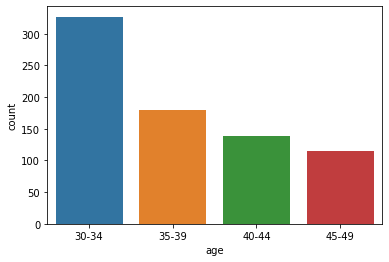

In [19]:
sns.countplot(df.age)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

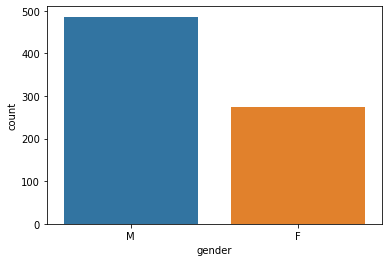

In [20]:
sns.countplot(df.gender)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='clicks', ylabel='Density'>

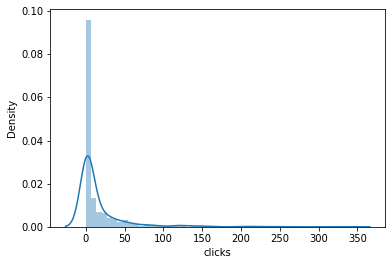

In [21]:
sns.distplot(df.clicks)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='spent', ylabel='Density'>

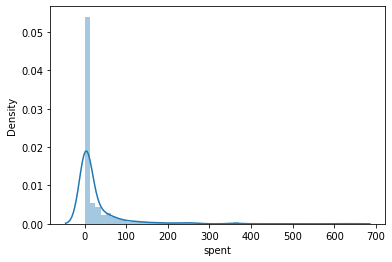

In [22]:
sns.distplot(df.spent)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='approved_conversion', ylabel='count'>

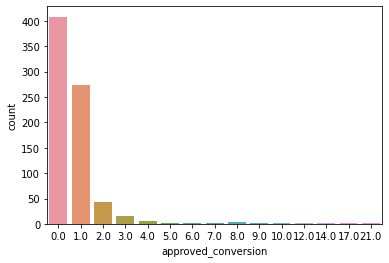

In [23]:
sns.countplot(df.approved_conversion)

# Data Analysis

In [24]:
# cost analysis
print('Campaign wise clicks')
print((df.groupby(['campaign_id'])).clicks.sum())
print('-------------------------')

print('Campaign wise amount spent')
print((df.groupby(['campaign_id'])).spent.sum())
print('--------------------------')


print('Campaign wise total conversions')
print((df.groupby(['campaign_id'])).total_conversion.sum())
print('---------------------------')

print('Campaign wise ad count')
print((df.groupby(['campaign_id'])).ad_id.count())
print('===========================')

Campaign wise clicks
campaign_id
1178    9577
916      113
936     1984
Name: clicks, dtype: int64
-------------------------
Campaign wise amount spent
campaign_id
1178    16577.159998
916       149.710001
936      2893.369999
Name: spent, dtype: float64
--------------------------
Campaign wise total conversions
campaign_id
1178    1050.0
916       58.0
936      537.0
Name: total_conversion, dtype: float64
---------------------------
Campaign wise ad count
campaign_id
1178    243
916      54
936     464
Name: ad_id, dtype: int64


In [25]:
campaign_1178_clicks = 9577
campaign_1178_cost = 16577.159998
campaign_1178_conv = 1050
campaign_1178_adcount = 243
campaign_1178_cpc = (campaign_1178_cost/campaign_1178_clicks)
campaign_1178_cpco = (campaign_1178_cost/campaign_1178_conv)
campaign_1178_cpad = (campaign_1178_cost/campaign_1178_adcount)

print('The cost per click of campaign_1178 is '+ str(campaign_1178_cpc))
print('The cost per conversion of campaign_1178 is '+ str(campaign_1178_cpco))
print('The cost per ad in campaign_1178 is '+ str(campaign_1178_cpad))
print('---------------------------------------------------------------')


campaign_936_clicks = 1984
campaign_936_cost = 2893.369999
campaign_936_conv = 537
campaign_936_adcount = 464
campaign_936_cpc = (campaign_936_cost/campaign_936_clicks)
campaign_936_cpco = (campaign_936_cost/campaign_936_conv)
campaign_936_cpad = (campaign_936_cost/campaign_936_adcount)

print('The cost per click of campaign_936 is '+ str(campaign_936_cpc))
print('The cost per conversion of campaign_936 is '+ str(campaign_936_cpco))
print('The cost per ad in campaign_936 is '+ str(campaign_936_cpad))
print('---------------------------------------------------------------')

campaign_916_clicks = 113
campaign_916_cost = 149.710001
campaign_916_conv = 58
campaign_916_adcount = 54
campaign_916_cpc = (campaign_916_cost/campaign_916_clicks)
campaign_916_cpco = (campaign_916_cost/campaign_916_conv)
campaign_916_cpad = (campaign_916_cost/campaign_916_adcount)

print('The cost per click of campaign_916 is '+ str(campaign_916_cpc))
print('The cost per conversion of campaign_916 is '+ str(campaign_916_cpco))
print('The cost per ad in campaign_916 is '+ str(campaign_916_cpad))
print('---------------------------------------------------------------')

The cost per click of campaign_1178 is 1.7309345304375063
The cost per conversion of campaign_1178 is 15.787771426666666
The cost per ad in campaign_1178 is 68.2187654238683
---------------------------------------------------------------
The cost per click of campaign_936 is 1.4583518140120968
The cost per conversion of campaign_936 is 5.388026068901303
The cost per ad in campaign_936 is 6.23571120474138
---------------------------------------------------------------
The cost per click of campaign_916 is 1.3248672654867257
The cost per conversion of campaign_916 is 2.5812069137931037
The cost per ad in campaign_916 is 2.772407425925926
---------------------------------------------------------------


- From the above analysis it is very clear that campaign 916 is the most efficient and profitable campaign. 
- The cpc and cost per conversion is very low compared other campaigns.
- If we scale up the campaign 916 to the budget of campaign 1178 we might drive 5 times more results of campaign 1178

Now we can create two dataframes, one for campaign 916 and another one for campaign 1178 and we can analyze them further

In [26]:
dfn = df.query('campaign_id =="916"')
dfn.head()

,ad_id,campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,916,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,916,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,916,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,916,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [27]:
dfm = df.query('campaign_id =="1178"')
dfm.head()

,ad_id,campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
518,1121091,1178,30-34,M,10,11,15,1194718.0,141,254.049996,28.0,14.0
519,1121092,1178,30-34,M,10,12,11,637648.0,67,122.400000,13.0,5.0
520,1121094,1178,30-34,M,10,16,15,24362.0,0,0.000000,1.0,1.0
521,1121095,1178,30-34,M,10,16,12,459690.0,50,86.330001,5.0,2.0
522,1121096,1178,30-34,M,10,11,16,750060.0,86,161.909999,11.0,2.0


In [ ]:
# gender analysis

In [28]:
print('Gender based analysis')
print((df.groupby(['gender'])).total_conversion.sum())
print((df.groupby(['gender'])).ad_id.count())
print((dfn.groupby(['gender'])).total_conversion.sum())
print((dfn.groupby(['gender'])).ad_id.count())
print((dfm.groupby(['gender'])).total_conversion.sum())
print((dfm.groupby(['gender'])).ad_id.count())

Gender based analysis
gender
F     322.0
M    1323.0
Name: total_conversion, dtype: float64
gender
F    275
M    486
Name: ad_id, dtype: int64
gender
F    20.0
M    38.0
Name: total_conversion, dtype: float64
gender
F    19
M    35
Name: ad_id, dtype: int64
gender
M    1050.0
Name: total_conversion, dtype: float64
gender
M    243
Name: ad_id, dtype: int64


- Though we can get more conversion by targeting Males alone, the cost per conversion is high (inferred from campaign 1178 analysis) and the number of ads.
- If there was to be more ads in campaign 916 the conversions would have been much higher
- From the above analysis we can conclude that we need to target both male and female. 

In [ ]:
#age analysis

In [29]:
print((df.groupby(['age'])).total_conversion.sum())
print((df.groupby(['age'])).ad_id.count())
print((dfn.groupby(['age'])).total_conversion.sum())
print((dfn.groupby(['age'])).ad_id.count())
print((dfm.groupby(['age'])).total_conversion.sum())
print((dfm.groupby(['age'])).ad_id.count())

age
30-34    890.0
35-39    357.0
40-44    235.0
45-49    163.0
Name: total_conversion, dtype: float64
age
30-34    327
35-39    180
40-44    139
45-49    115
Name: ad_id, dtype: int64
age
30-34    31.0
35-39    13.0
40-44     7.0
45-49     7.0
Name: total_conversion, dtype: float64
age
30-34    29
35-39    12
40-44     6
45-49     7
Name: ad_id, dtype: int64
age
30-34    632.0
35-39    248.0
40-44    145.0
45-49     25.0
Name: total_conversion, dtype: float64
age
30-34    102
35-39     79
40-44     58
45-49      4
Name: ad_id, dtype: int64


- Though we can get more conversion by targeting 30-34 and 35-39 alone, the cost per conversion is high (inferred from campaign 1178 analysis).
- The number of ads are also different. If there was to be more ads in campaign 916 the conversions would have been much higher
- From the above analysis we can conclude that we need to target all four age ranges 

In [ ]:
# Interests analysis

In [30]:
(dfn.groupby(['interest1'])).total_conversion.sum()

interest1
7      2.0
10     2.0
15    11.0
16    18.0
18     1.0
19     1.0
20     3.0
21     1.0
24     1.0
25     1.0
27     3.0
28     4.0
29     3.0
30     1.0
31     2.0
32     1.0
63     2.0
65     1.0
Name: total_conversion, dtype: float64

In [31]:
(dfn.groupby(['interest2'])).total_conversion.sum()

interest2
8      1.0
12     1.0
13     1.0
16     3.0
17     3.0
18     4.0
19    10.0
20     4.0
21     3.0
22     3.0
24     1.0
25     2.0
26     4.0
29     1.0
30     2.0
31     2.0
32     2.0
33     4.0
34     2.0
37     2.0
64     1.0
67     1.0
70     1.0
Name: total_conversion, dtype: float64

In [32]:
(dfn.groupby(['interest3'])).total_conversion.sum()

interest3
8      1.0
10     1.0
11     2.0
16     1.0
17     6.0
18     2.0
19     2.0
20    10.0
21     4.0
22     6.0
23     3.0
24     1.0
26     1.0
27     1.0
29     1.0
30     1.0
31     4.0
32     5.0
33     1.0
34     1.0
38     1.0
65     1.0
68     2.0
Name: total_conversion, dtype: float64

In [33]:
(dfm.groupby(['interest1'])).total_conversion.sum()

interest1
2      25.0
7      38.0
10    128.0
15    103.0
16    131.0
18     27.0
19     39.0
20     66.0
21     17.0
22     23.0
23     15.0
24     14.0
25     38.0
26     11.0
27     55.0
28     71.0
29    113.0
30     20.0
31      8.0
32     26.0
36     17.0
63     19.0
64     21.0
65     15.0
66     10.0
Name: total_conversion, dtype: float64

In [34]:
(dfm.groupby(['interest2'])).total_conversion.sum()

interest2
3       2.0
4       8.0
5       7.0
6       1.0
7       2.0
8       5.0
9       5.0
10      6.0
11     48.0
12     17.0
13     41.0
14      5.0
15     12.0
16     39.0
17     24.0
18     37.0
19      8.0
20    152.0
21     46.0
22     20.0
23     26.0
24     20.0
25     17.0
26     47.0
27     22.0
28     51.0
29     62.0
30     22.0
31     31.0
32     42.0
33     40.0
34     49.0
35     34.0
36      6.0
37     13.0
38      7.0
39      1.0
40      4.0
41      5.0
42      1.0
64      6.0
65      7.0
66     15.0
67     10.0
68      8.0
69      6.0
70      8.0
71      4.0
72      1.0
Name: total_conversion, dtype: float64

In [35]:
(dfm.groupby(['interest3'])).total_conversion.sum()

interest3
3      3.0
4      1.0
5      8.0
6      2.0
7     11.0
9      2.0
10    26.0
11    25.0
12    23.0
13    13.0
14     3.0
15    41.0
16    35.0
17    71.0
18    38.0
19    12.0
20    51.0
21    47.0
22    67.0
23    16.0
24    57.0
25    28.0
26    14.0
27    23.0
28    10.0
29    62.0
30    25.0
31    70.0
32    31.0
33    88.0
34    28.0
35    25.0
36     7.0
37     9.0
38     4.0
39     2.0
40     1.0
41     5.0
42     1.0
64     5.0
65     7.0
66     3.0
67    15.0
68     7.0
69    10.0
70    12.0
71     5.0
72     1.0
Name: total_conversion, dtype: float64

# Final Report  

from the above analysis,
- The ideal campaign for the most efficient results can be created with the following metrics :
    - Gender : M | F (Both)
    - Age : 30 - 49 (Including all four age bands)
    - Interest1 : 16
    - Interest2 : 19
    - Interest3 : 20 
    
- We can try out different campaigns by slightly adjusting the interests. The list of possible interests are :
    - Interest1 : 10 , 15 , 29
    - Interest2 : 20
    - Interest3 : 17 , 31 , 33
 
we can try differnt combinations of interests using the above lists and drive more efficient results 